Introduction to Python
================================

Lesson 3 - Part1
--------

## Summary 

In this lesson we will focus on Neural Network. The lesson is divided between an introduction an a technical part
The topis that we'll cover are in the introduction are:

  - Tensorflow
  - Keras 
  
For the technical part we will create some models for:

  - Single class classification
  - Multi class classification
  - Custom model


## Introduction

Today there are many framework that allow to create a Neural Network, like:

  - Tensorflow 
  - Theano
  - Caffe
  - MXNett
  - CNTK
  
Among all of them, probabilly the most famous is Tensorflow.

Considering the support, the community the resources available, Tensorflow is the engine chosen for this course.  

## Tensorflow

[Tensorflow](https://www.tensorflow.org/) it was originally developed by Google, now it's open source.

The definition from the web site is the following:

*TensorFlow™ is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.*

Google has deeply invested in this project, to the point that now in Google Cloud there are available some instances with GPU's (called TPU's) designed especially for TensorFlow. 

## Keras

In order to simply the definition of the Neural Network and to speed up the development time we'll not use TensorFlow directly.
Instead we'll use [Keras](https://keras.io/).

The definition from the website is the following:

*Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
*

As you can see from the description, Keras offers another advantage: with just a change of setting the same code can be used with:

  - Tensorflow
  - Theano
  - CNTK

## Tensorflow 2.0

Tensorflow 2.0 has been released on September 30th 2019.

The main new feature in this new relese in that Keras' API are now the official High Level APIs of Tensorflow, directly supported by the project itself.

Quoting the home page of Keras:

*At this time, we recommend that Keras users who use multi-backend Keras with the TensorFlow backend switch to tf.keras in TensorFlow 2.0. tf.keras is better maintained and has better integration with TensorFlow features (eager execution, distribution support and other).*


## Comparison between Keras and Tensorflow

In order to undestand the advantage of using Keras, we will consider the code necessary to define the same network using TensorFlow directly or Keras.

Before moving on we must remember what are the parameters involved with a neural network.

Can you list me those parameters?

  - num imp.
  - num. layers
  - num. out 
  - node in layers 
  - activation 
  - loss
  - optimization
  - epoch 
  - batch size

## TensoFlow Multiclass

Let's create a neural network to be used over the classic [mnsit](http://yann.lecun.com/exdb/mnist/) hand written digits with two hidden layer to classify samples in to the 10 possible classes. 



In [6]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist.test

In [7]:
from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf

# Parameters
learning_rate = 0.1
num_steps = 15
batch_size = 128
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}


# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))

W1030 17:11:46.189947 4574193088 deprecation.py:323] From <ipython-input-7-7f6d4416490f>:54: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Step 1, Minibatch Loss= 7764.5581, Training Accuracy= 0.383
Step 2, Minibatch Loss= 10254.6035, Training Accuracy= 0.469
Step 3, Minibatch Loss= 11284.6406, Training Accuracy= 0.508
Step 4, Minibatch Loss= 13357.6621, Training Accuracy= 0.422
Step 5, Minibatch Loss= 7776.8623, Training Accuracy= 0.578
Step 6, Minibatch Loss= 5782.4629, Training Accuracy= 0.594
Step 7, Minibatch Loss= 2082.1309, Training Accuracy= 0.719
Step 8, Minibatch Loss= 2376.5703, Training Accuracy= 0.695
Step 9, Minibatch Loss= 3301.7427, Training Accuracy= 0.703
Step 10, Minibatch Loss= 1859.7058, Training Accuracy= 0.711
Step 11, Minibatch Loss= 1238.5892, Training Accuracy= 0.758
Step 12, Minibatch Loss= 1334.7411, Training Accuracy= 0.828
Step 13, Minibatch Loss= 2748.2046, Training Accuracy= 0.688
Step 14, Minibatch Loss= 2132.0815, Training Accuracy= 0.734
Step 15, Minibatch Loss= 1643.2915, Training Accuracy= 0.820
Optimization Finished!
Testing Accuracy: 0.7726


## Keras Multiclass

Let's create a neural network to be used over the classic [mnsit](http://yann.lecun.com/exdb/mnist/) hand written digits with two hidden layer to classify samples in to the 10 possible classes.

In [25]:
import pandas as pd
import numpy as np
from tensorflow import keras as keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import advanced_activations
from keras.optimizers import Adam

# Parameters
learning_rate = 0.001
num_steps = 20
batch_size = 128

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

#
activationFun = 'relu'
#activationFun = 'softmax'

tryOverfit = False

#Definition of the model type
model = Sequential()
#Definition of the layers
model.add(Dense(num_input, input_dim=num_input,activation=activationFun))
model.add(Dense(n_hidden_1,activation=activationFun))
model.add(Dense(n_hidden_2,activation=activationFun))
if tryOverfit:
    model.add(Dense(n_hidden_2,activation=activationFun))
    model.add(Dense(n_hidden_2,activation=activationFun))
    model.add(Dense(n_hidden_2,activation=activationFun))
model.add(Dense(num_classes,activation='softmax'))

#Creation of the model
adam = Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])
#Fit of the network
X = mnist.train.images
Y = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels
history = model.fit(X, Y, epochs=num_steps, batch_size=batch_size,validation_data=(X_test,Y_test))#validation_split=0.05
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 81us/step - loss: 0.2291 - acc: 0.9319 - val_loss: 0.0957 - val_acc: 0.9699
Epoch 2/20
55000/55000 [==============================] - 4s 76us/step - loss: 0.0850 - acc: 0.9731 - val_loss: 0.0949 - val_acc: 0.9706
Epoch 3/20
55000/55000 [==============================] - 4s 70us/step - loss: 0.0533 - acc: 0.9835 - val_loss: 0.0843 - val_acc: 0.9745
Epoch 4/20
55000/55000 [==============================] - 3s 61us/step - loss: 0.0405 - acc: 0.9869 - val_loss: 0.0655 - val_acc: 0.9819
Epoch 5/20
55000/55000 [==============================] - 4s 67us/step - loss: 0.0348 - acc: 0.9885 - val_loss: 0.0673 - val_acc: 0.9814
Epoch 6/20
55000/55000 [==============================] - 4s 65us/step - loss: 0.0263 - acc: 0.9912 - val_loss: 0.0770 - val_acc: 0.9775
Epoch 7/20
55000/55000 [==============================] - 3s 64us/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.0719 - val_acc

## Warning

Keras is an API, so the implementation of function is not one to one with TensorFlow. Often similar parameters can bring to different results.

**You have to optimize the network for Keras, not for Tensorflow**.

## Analysis' Results

If we take a closer look to the results of the network what we can see?

During the fit of the model, with `history = model.fit`, we have stored in `history` all the values of **loss** and **accuracy** for train and test.

Note that must pass some validation data or a validation split using `validation_data` or `validation_split` parameters in `model.fit` 

We can define these and other metrics to be use using the parameter `metrics` in `model.compile`.

In [22]:
pd.DataFrame(history.history)

,val_loss,val_acc,loss,acc
0,0.103425,0.9678,0.232174,0.930000
1,0.105860,0.9670,0.084149,0.973764
2,0.075614,0.9769,0.056409,0.981800
3,0.070342,0.9806,0.039610,0.986982
4,0.090939,0.9741,0.033351,0.989018
5,0.069863,0.9802,0.024377,0.992109
6,0.079910,0.9786,0.022430,0.992436
7,0.096666,0.9753,0.017708,0.994309
8,0.074285,0.9812,0.017891,0.993600
9,0.086267,0.9785,0.016958,0.994600


Text(0, 0.5, 'Loss')

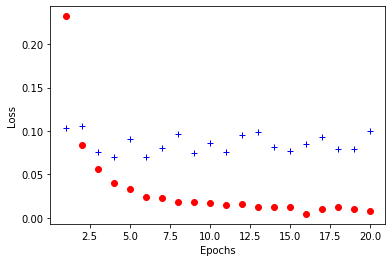

In [23]:
from matplotlib import pyplot as plt
history_dict=history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'ro')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

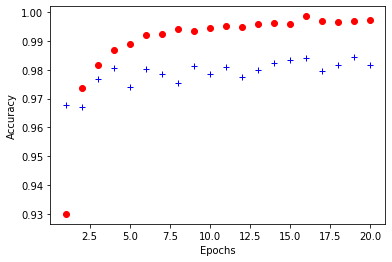

In [24]:
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'ro')
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

## Keras Single Class

Now we'll make an example of a binary classification task using Keras.

The dataset is hosted on [Kaggle](https://www.kaggle.com/) and it's the [Promotion Response for a New Product](https://www.kaggle.com/regivm/promotion-response-and-target-datasets/version/1).

The description of th dataset is the following:

*The context of this business problem is new product introduction. A business organization developed a new product and promoted this to its existing customers. Initially it chose a sample of customers for promotion and the response information is available in the 'promoted' dataset. The organization is interested in building a model to select the best customers for contacting from the pool of customers not contacted ('target' dataset).*

and the columns are:

  - customer_id
  - **res** (what we want to predict)
  - card_tenure
  - risk_score
  - num_promoted
  - avg_bal
  - geo_group
  - res_type

## Python Class 

To learn something new, we'll make the code of this model using Python classes.

A **Class** is a blueprint for an object, that can contain variables and functions (called method).

The characteristics of a Python Class are:
  
  - `__init__` function
  - Properties 
  - Methods 
  - `self` parameter
  

Please note similarity of our class with all what we have used so far.

In [30]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import advanced_activations
from keras.optimizers import Adam
from sklearn import preprocessing
import logging
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger('pippo')

# Parameters
learning_rate = 0.001
num_steps = 15
batch_size = 128
n_fold = 5

# Network Parameters
n_hidden_1 = 25 # 1st layer number of neurons
n_hidden_2 = 10 # 2nd layer number of neurons
#num_input = 6 # MNIST data input (img shape: 28*28)
num_classes = 1 # MNIST total classes (0-9 digits)

trainFile = 'promoted.csv'
predFile = 'target.csv'

#
activationFun = 'relu'
#activationFun = 'softmax'

testOneHot = True

class LoadData:
    def __init__(self,**kargs):
        self.path = 'data'
        self.trainFile = kargs['tr']
        self.colList = ['avg_bal','geo_group', 'res_type']
        
    def readFiles(self,fileName):
        fullPath = os.path.join(self.path,fileName)
        logger.info('READING %s',fullPath)
        df = pd.read_csv(fullPath,sep=',',dtype={'avg_bal':'category', 'geo_group':'category', 'res_type':'category',})#dtype={'avg_bal':'category', 'geo_group':'category', 'res_type':'category',}
        logger.info('LOADED DATASET WITH SHAPE %s AND COLUMUNS %s',str(df.shape),str(df.columns))
        print('After reading',df.describe())
        return df
    
    def useOneHot(self,df):
        print('SHAPE OF DF: %i X %i'%(df.shape[0],df.shape[1]))
        df2Enc = df.loc[:,self.colList]
        print('SHAPE OF DF2ENC: %i X %i'%(df2Enc.shape[0],df2Enc.shape[1]))
        enc = OneHotEncoder()
        dfEnc = enc.fit_transform(df2Enc)
        print('SHAPE OF DFENC: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        print(type(dfEnc))
        dfEnc = pd.DataFrame(dfEnc.toarray())
        print('SHAPE OF DFENC: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        #df.drop(columns=self.colList,inplace=True)
        return dfEnc
        
        
    def prepareTrain(self):
        dfTrain = self.readFiles(self.trainFile)
        logger.info('REMOVING ROWS WITH NA')
        logger.info('NROWS BEFORE REMOVING NA %i',dfTrain.shape[0])
        dfTrain.dropna(inplace=True)
        logger.info('NROWS AFTER REMOVING NA %i',dfTrain.shape[0])
        Y_train = dfTrain.loc[:,'resp']
        logger.info('CONSIDERING LEVELS FOR CATEGORICAL COLUMNS')
        if testOneHot:
            dfEnc = self.useOneHot(dfTrain)
            print('SHAPE OF X_train: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        else:
            for curCol in self.colList:
                X_train[curCol] = dfTrain[curCol].cat.codes
        logger.info('SCALING OF NUMERIC COLUMNS')
        mmscaler = preprocessing.MinMaxScaler()
        for curCol in ['card_tenure', 'risk_score', 'num_promoted']:
            curFeat = mmscaler.fit_transform(dfTrain[[curCol]])  
            dfEnc[curCol] = curFeat.reshape(-1,1)
        print('SHAPE OF dfEnc AFTER ALL: %i X %i'%(dfEnc.shape[0],dfEnc.shape[1]))
        print('AFTER PREPROCESSING dfEnc HAS COLUMUNS %s AND TYPES %s'%(str(dfEnc.columns),str(dfEnc.dtypes)))
        return dfEnc, Y_train

class CreateNN:
    def __init__(self,**kargs):
        self.X_train = kargs['xt']
        self.Y_train = kargs['yt']
        self.kFold = kargs['kf']
        self.i = 1
        self.num_input = self.X_train.shape[1]
        
    def modelDefinition(self):
        logger.info('DEFINITION OF THE MODEL')
        self.model = Sequential()
        self.model.add(Dense(self.num_input, input_dim = self.num_input,activation=activationFun))
        self.model.add(Dense(n_hidden_1,activation = activationFun))
        self.model.add(Dense(n_hidden_2,activation = activationFun))
        self.model.add(Dense(num_classes,activation = 'sigmoid'))
        print(self.model.summary())
    
    def modelCompile(self):
        logger.info('COMPILATION OF THE MODEL')
        adam = Adam(lr = learning_rate)
        self.model.compile(loss = 'binary_crossentropy', optimizer = adam,metrics = ['accuracy'])
        
    def modelEval(self):
        logger.info('EVALUATION OF THE MODEL')
        totalScores = list()
        logger.info('START OF THE CROSS VALIDATION')
        for train,test in self.kFold.split(self.X_train, self.Y_train):
            logger.info('WORKING ON FOLD %i',self.i)
            print('train set',train)
            history = self.model.fit(self.X_train.iloc[train], self.Y_train.iloc[train],
                                     epochs=num_steps, 
                                     batch_size = batch_size) #validation_data=(self.X_train.iloc[test], self.Y_train.iloc[test])
            scores = self.model.evaluate(self.X_train.iloc[test], self.Y_train.iloc[test])
            totalScores.append(scores[1])
            self.i += 1
        return history, self.model, totalScores

    
    
def main():
    #Inizialization of the class LoadData 
    logger.info('INIZIALIZATION OF LOADDATA')
    ld = LoadData(tr=trainFile)
    df2Pred = ld.readFiles(predFile)
    X_train, Y_train = ld.prepareTrain()
    kfold = StratifiedKFold(n_splits=n_fold)
    logger.info('INIZIALIZATION OF CreateNN')
    cnn = CreateNN(xt=X_train,yt=Y_train,kf=kfold)
    cnn.modelDefinition()
    cnn.modelCompile()
    history, model, totalScores = cnn.modelEval() 
    logger.info('EVALUATION COMPLETED')
    logger.info("FOR THE ACTUAL MODEL THE RESULTS OF %s IS: %.2f%%+/-%.2f%%" % (model.metrics_names[1], np.mean(totalScores),np.std(totalScores)))
    return X_train,Y_train, history,totalScores
    
X_train,Y_train, history,totalScores = main()

After reading          card_tenure     risk_score   num_promoted  Unnamed: 7
count  107792.000000  110000.000000  110000.000000         0.0
mean      138.956564     655.571482       0.006782         NaN
std        67.433081      81.252328       0.082183         NaN
min        12.000000     520.000000       0.000000         NaN
25%        91.000000     600.000000       0.000000         NaN
50%       135.000000     678.000000       0.000000         NaN
75%       179.000000     720.000000       0.000000         NaN
max       641.000000     760.000000       2.000000         NaN
After reading                resp   card_tenure    risk_score  num_promoted
count  25000.000000  24515.000000  25000.000000  25000.000000
mean       0.068640    139.491617    655.091680      0.007000
std        0.252846     66.998010     81.315116      0.083374
min        0.000000      0.000000    520.000000      0.000000
25%        0.000000     95.000000    599.000000      0.000000
50%        0.000000    135.000000

17920/17920 [==============================] - 20s 1ms/step - loss: 0.0871 - acc: 0.9624
Epoch 9/15
17920/17920 [==============================] - 22s 1ms/step - loss: 0.0862 - acc: 0.9628
Epoch 10/15
17920/17920 [==============================] - 21s 1ms/step - loss: 0.0856 - acc: 0.9622
Epoch 11/15
17920/17920 [==============================] - 20s 1ms/step - loss: 0.0845 - acc: 0.9629
Epoch 12/15
17920/17920 [==============================] - 21s 1ms/step - loss: 0.0847 - acc: 0.9627
Epoch 13/15
17920/17920 [==============================] - 20s 1ms/step - loss: 0.0836 - acc: 0.9629
Epoch 14/15
17920/17920 [==============================] - 21s 1ms/step - loss: 0.0830 - acc: 0.9627
Epoch 15/15
4480/4480 [==============================] - 1s 199us/step
train set [    0     1     2 ... 22397 22398 22399]
Epoch 1/15
17920/17920 [==============================] - 21s 1ms/step - loss: 0.1089 - acc: 0.9579
Epoch 2/15
17920/17920 [==============================] - 21s 1ms/step - loss: 0.09

## Exercise Model

Try to understand the best parameters for the above model using what we have learned in this lesson (hint: look if the model is overfitting).

After the definition of a good model, try to make the prediction over the pred set.

## Exercise Class

Try to re-write the first Keras Model using a *Class* approach.  

## Custom model

The models that we have built in the previous examples are made using the **Sequantial model**: `from keras.models import Sequential`.

The sequential model is the standard to create a network with a sequence of layers,one after the other.

Aside from that model, Keras give us the possibility to create networks with others layout ([more info about models](https://keras.io/models/about-keras-models/)).

This is done with the **functional API** ([more about functional API](https://keras.io/models/model/)).

The functional API usable with this import `from keras.models import Model`.

**NOTE:** with this kinf of model we are working directly with tensors ([wiki tensor](https://en.wikipedia.org/wiki/Tensor)). 

In this case we want to build a model that "simulate" a linear regression using a neural network.

In [26]:
import keras
from keras.layers import Input, Dense
from keras.models import Model
import pandas as pd

inputs = Input(shape=(1,))
preds = Dense(1,activation='linear')(inputs)
x = np.array([1,2,3,4,5])
y = x*2
x_test = x*10
y_test = x_test*2

model = Model(inputs=inputs,outputs=preds)
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])
model.fit(x,y, batch_size=1, epochs=30, shuffle=False)
#model.predict(x_test).shape
res = pd.DataFrame({'pred':model.predict(x_test)[:,0],'real':y_test})
res

Epoch 1/30
5/5 [==============================] - 0s 72ms/step - loss: 15.7559 - mean_squared_error: 15.7559
Epoch 2/30
5/5 [==============================] - 0s 822us/step - loss: 0.7632 - mean_squared_error: 0.7632
Epoch 3/30
5/5 [==============================] - 0s 722us/step - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 4/30
5/5 [==============================] - 0s 1ms/step - loss: 0.0428 - mean_squared_error: 0.0428
Epoch 5/30
5/5 [==============================] - 0s 932us/step - loss: 0.0425 - mean_squared_error: 0.0425
Epoch 6/30
5/5 [==============================] - 0s 1ms/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 7/30
5/5 [==============================] - 0s 846us/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 8/30
5/5 [==============================] - 0s 1ms/step - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 9/30
5/5 [==============================] - 0s 1ms/step - loss: 0.0375 - mean_squared_error: 0.0375
Epoch 10/30
5/5 [==================

,pred,real
0,19.604548,20
1,38.918015,40
2,58.231480,60
3,77.544945,80
4,96.858406,100


In [27]:
model.summary()
type(inputs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


tensorflow.python.framework.ops.Tensor